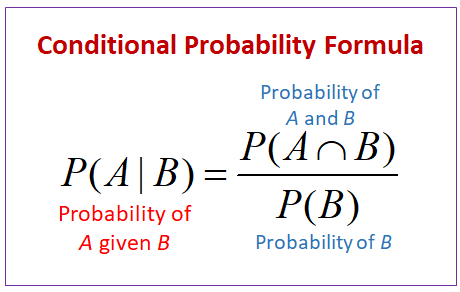

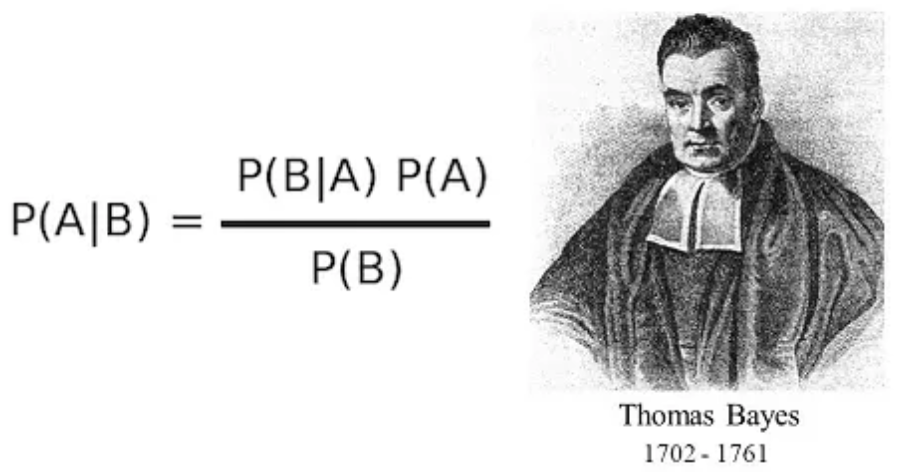

# Problem Statement

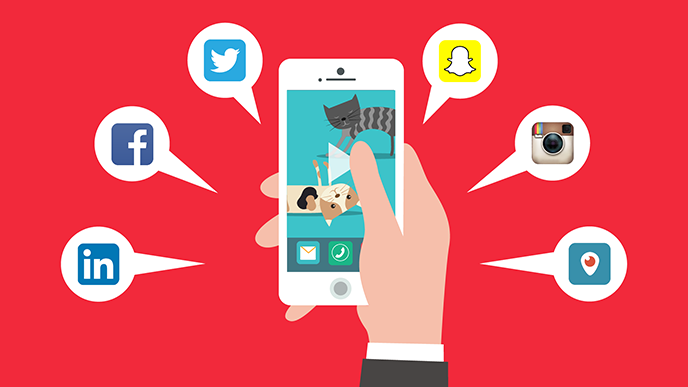

Social Network ad dataset , The dataset contains the detail of users in a social networking site to find whether a user buys a product by clicking the ad on the site based on salary , age and gender


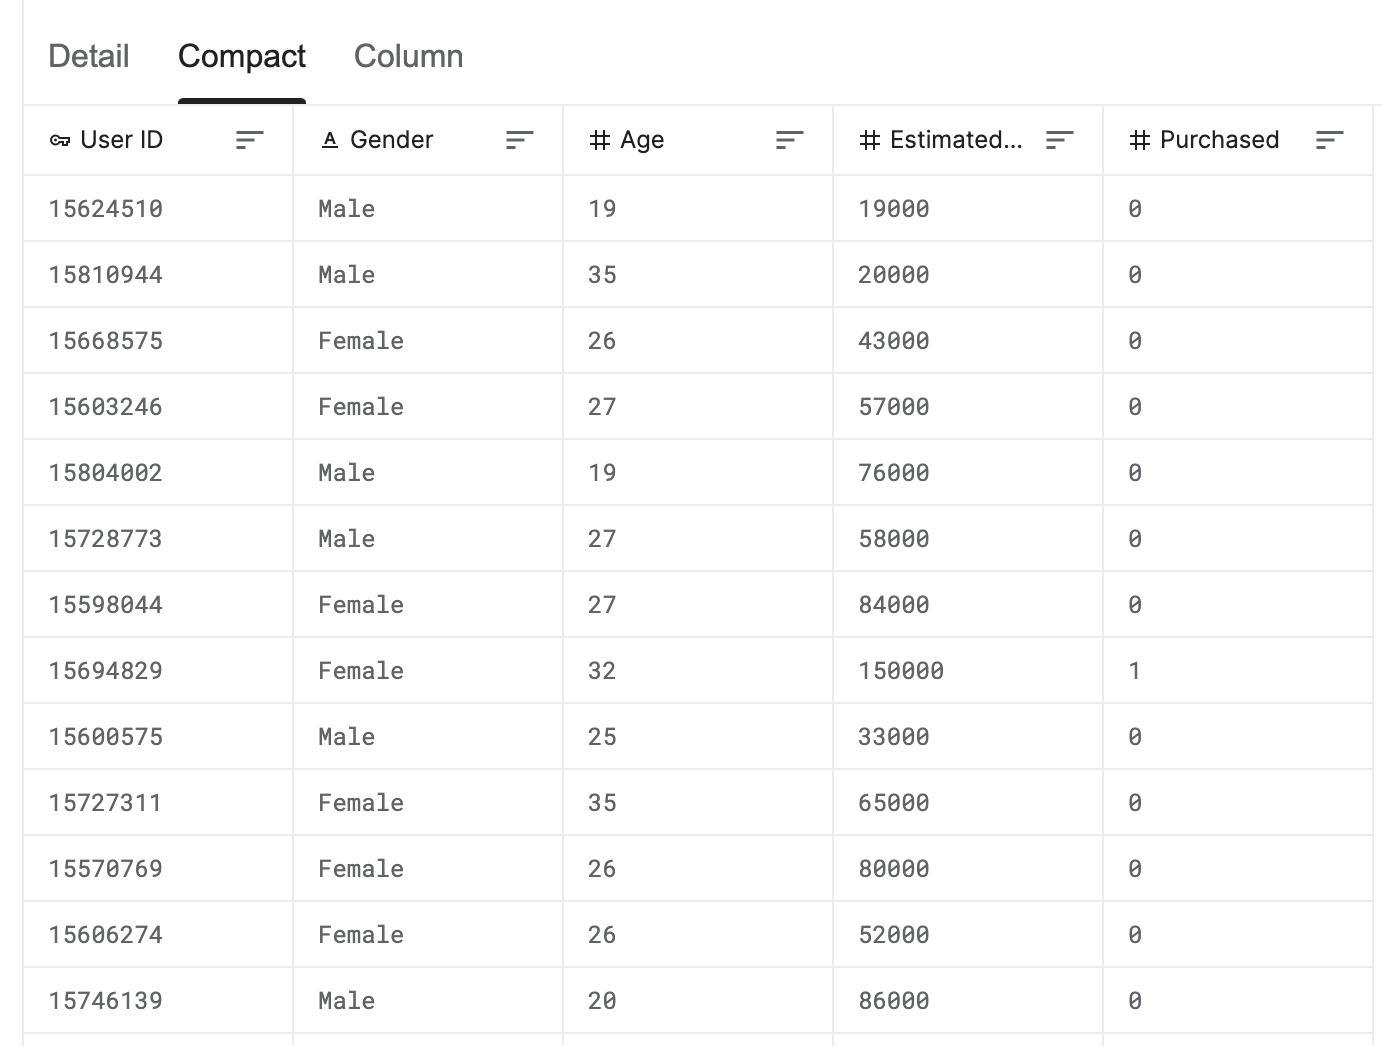

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataset
data=pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [17]:
from sklearn import preprocessing

In [23]:
le=preprocessing.LabelEncoder()

In [24]:
X=data.iloc[:,[1,2,3]].values

In [25]:
y=data.iloc[:,-1].values

In [26]:
X[:,0]=le.fit_transform(X[:,0])

In [27]:
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

### Split Data

In [28]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2)

In [29]:
print("Shape of the X_train", X_train.shape) 
print("Shape of the y_train", y_train.shape) 
print("Shape of the X_test", X_test.shape) 
print("Shape of the y_test", y_test.shape)

Shape of the X_train (320, 3)
Shape of the y_train (320,)
Shape of the X_test (80, 3)
Shape of the y_test (80,)


In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [31]:
sc=StandardScaler()

In [33]:
X_train=sc.fit_transform(X_train)

In [35]:
X_test=sc.fit_transform(X_test)

In [36]:
# Model
from sklearn.naive_bayes import GaussianNB

In [37]:
model=GaussianNB()

In [38]:
model.fit(X_train, y_train)

GaussianNB()

In [39]:
y_pred=model.predict(X_test)

In [40]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [41]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [42]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [43]:
accuracy_score(y_test,y_pred)

0.825

In [44]:
confusion_matrix(y_test,y_pred)

array([[44,  4],
       [10, 22]])